In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import osmnx as ox

nombre de quartier = 17


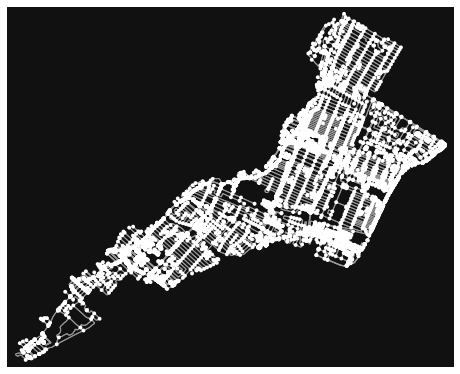

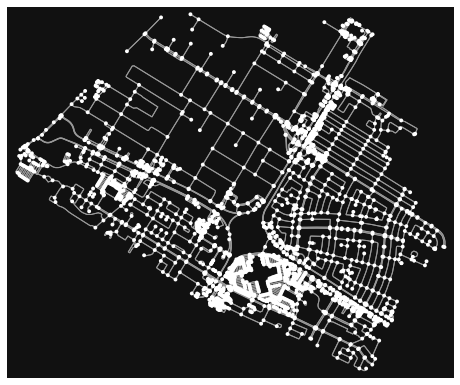

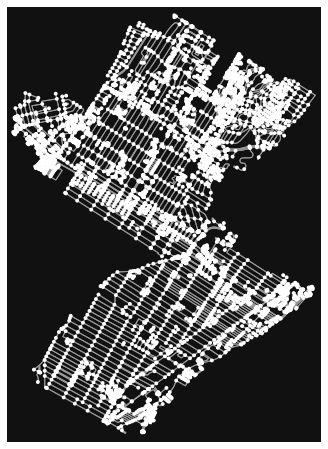

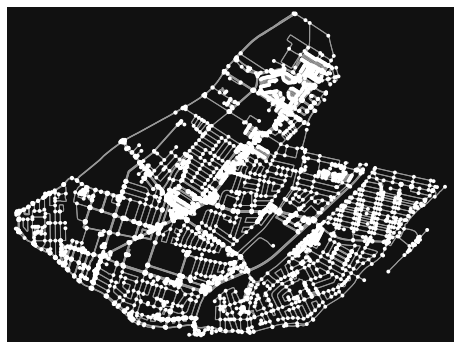

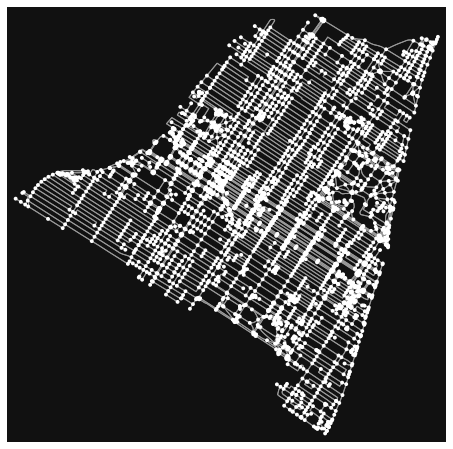

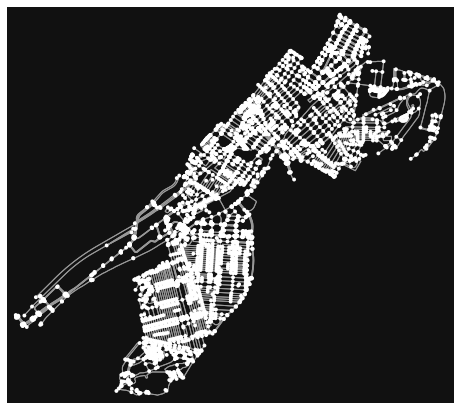

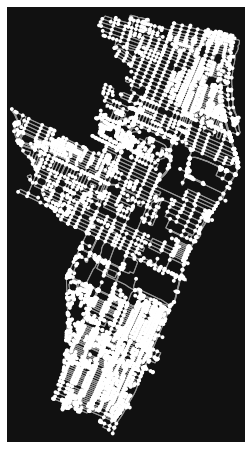

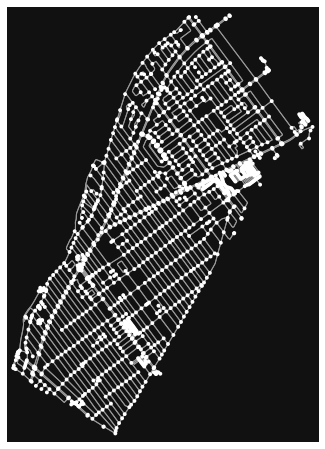

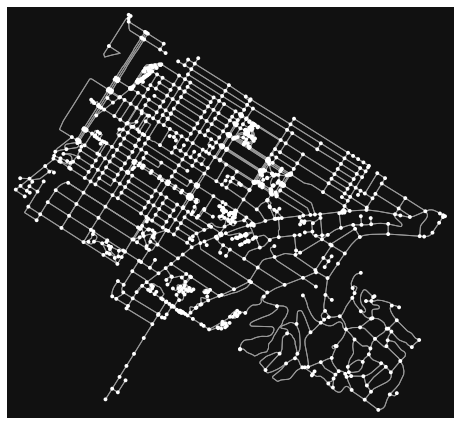

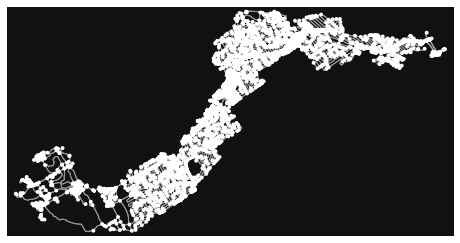

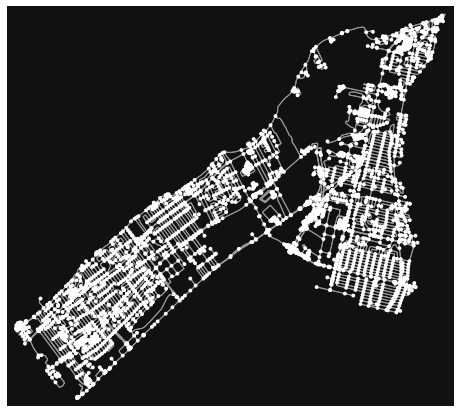

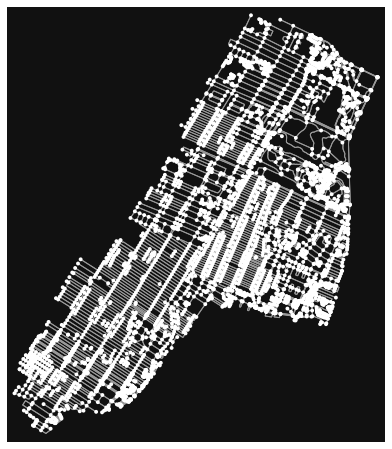

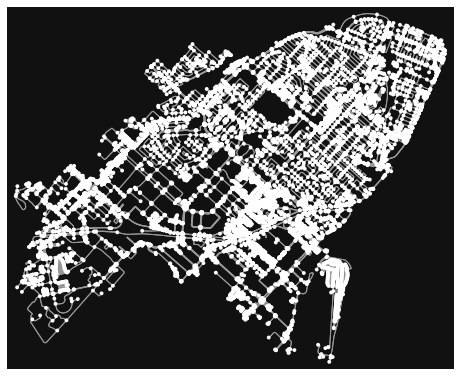

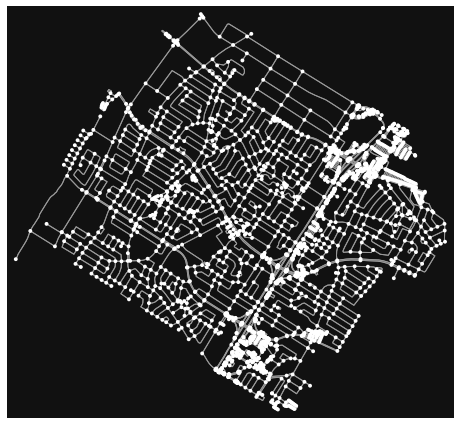

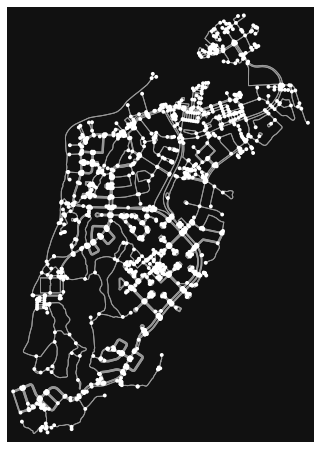

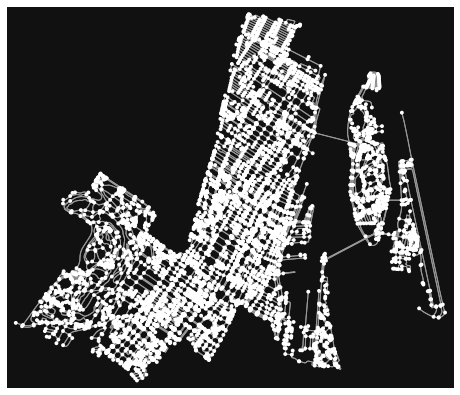

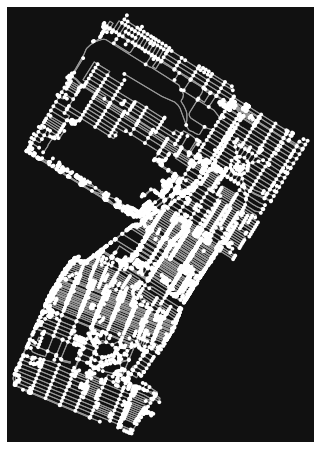

In [4]:
places = ["Ahuntsic-Cartierville, Montreal, Canada",
          "Anjou, Montreal, Canada",
          "Côte-des-Neiges–Notre-Dame-de-Grâce, Montreal, Canada",
          "LaSalle, Montreal, Canada",
          "Le Plateau-Mont-Royal, Montreal, Canada",
          "Le Sud-Ouest, Montreal, Canada",
          "Mercier–Hochelaga-Maisonneuve, Montreal, Canada",
          "Montréal-Nord, Montreal, Canada",
          "Outremont, Montreal, Canada",
          "Pierrefonds-Roxboro, Montreal, Canada",
          "Rivière-des-Prairies–Pointe-aux-Trembles, Montreal, Canada",
          "Rosemont–La Petite-Patrie, Montreal, Canada",
          "Saint-Laurent, Montreal, Canada",
          "Saint-Léonard, Montreal, Canada",
          "Verdun, Montreal, Canada",
          "Ville-Marie, Montreal, Canada",
          "Villeray–Saint-Michel–Parc-Extension, Montreal, Canada"]

print("nombre de quartier = " + str(len(places)))
quartier = []

def plotDistrict(place):
    G = ox.graph_from_place(place, network_type="walk")
    quartier.append(G)
    ox.plot_graph(G)

for i in range(len(places)):
    plotDistrict(places[i])

In [5]:
class Graph:
    def __init__(self, nodes=[], edges=[], directed=True):
        self.nodes = list(G.nodes)
        self.edges = list(G.edges)
        
        self.n = len(self.nodes)
        self.dict = {}
        
        for i in range(self.n):
            node = self.nodes[i]
            self.dict[node] = ([], i)

        for edge in self.edges:
            x,y,w = edge
            self.dict[x][0].append(y)
            
        self.isDirected = directed

    def odd_vertices(self):
        deg = [0] * self.n
        for (a,b,w) in self.edges:
            deg[self.dict[a][1]] += 1
            deg[self.dict[b][1]] += 1
        return [a for a in range(self.n) if deg[a] % 2]

    def is_edge_connected(self):
        if self.n == 0 or len(self.edges) == 0:
            return True
        # Convert to adjacency list
        succ = [[] for a in range(self.n)]
        for (a,b,w) in self.edges:
            succ[self.dict[a][1]].append(self.dict[b][1])
            succ[self.dict[b][1]].append(self.dict[a][1])
        # BFS over the graph, starting from one extremity of the first edge
        touched = [False] * self.n
        init = self.dict[self.edges[0][0]][1]
        touched[init] = True
        todo = [init]
        while todo:
            s = todo.pop()
            for d in succ[s]:
                if touched[d]:
                    continue
                touched[d] = True
                todo.append(d)
        for a in range(self.n):
            if succ[a] and not touched[a]:
                return False
        return True

    def is_eulerian(self):
        return self.is_edge_connected() and not self.odd_vertices()
    
    def find_eulerian_cycle(self):
        if not self.is_eulerian():
            print("not eulerian")
            return []
        if len(self.edges) == 0:
            return []
        cycle = [self.dict[self.edges[0][0]][1]] # start somewhere

        edges = self.edges
        while True:
            rest = []
            for (a, b, w) in edges:
                ia, ib = self.dict[a][1], self.dict[b][1]
                if cycle[-1] == ia:
                    cycle.append(ib)
                elif cycle[-1] == ib:
                    cycle.append(ia)
                else:
                    rest.append((a,b,0))
 
            if not rest:
                assert cycle[0] == cycle[-1]
                return cycle[0:-1]
            edges = rest
            if cycle[0] == cycle[-1]:
                # Rotate the cycle so that the last state
                # has some outgoing edge in EDGES.
                for (a,b,w) in edges:
                    ia, ib = self.dict[a][1], self.dict[b][1]
                    if ia in cycle:
                        idx = cycle.index(ia)
                        cycle = cycle[idx:-1] + cycle[0:idx+1]
                        break


In [6]:
graphs = []

for G in quartier:
    graph = Graph(G.nodes, G.edges, directed=True)
    graphs.append({"graph": graph, "eulerian_cycle": graph.find_eulerian_cycle()})

In [8]:
from threading import Thread
import time

def launchDrone(path, index):
    start = time.time()
    print("Drone numéro " + str(index) + " part en répérage à " + str(time.ctime(start)) + "!\n")
    for i in path:
        time.sleep(0.05)
    end = time.time()
    print("Drone numéro " + str(index) + " à fini son travail " + str(time.ctime(start + end - start)) + "!\n")

i = 1
for obj in quartier:
    t = Thread(target=launchDrone, args=(quartier["eulerian_cycle"], i,))
    t.start()
    i += 1

TypeError: list indices must be integers or slices, not str